In [1]:
pip install apyori

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import apyori
from apyori import apriori
 

In [54]:
Raw_data = pd.read_csv("https://redhawks-my.sharepoint.com/:x:/g/personal/pbhatia_seattleu_edu/EZv-2oJQtpVDl2hjBqB0GmABw57XlEReTH4xUlJIF9KMyQ?e=mJWugr")
Raw_data.shape

HTTPError: HTTP Error 403: Forbidden

In [4]:
Raw_data.drop_duplicates(keep=False,inplace=True)
Raw_data.shape

(19932, 3)

In [5]:
Raw_data.head()

,PurchaseID,Item,Date
0,1,tropical fruit,7/21/15
1,1,rolls/buns,7/21/15
2,1,candy,7/21/15
3,2,whole milk,5/1/15
4,2,tropical fruit,5/1/15


In [6]:
Item_count = Raw_data.groupby(by="Item")["PurchaseID"].nunique().reset_index(name="count").sort_values(by="count",ascending=False)
Item_count

,Item,count
161,whole milk,1356
101,other vegetables,985
120,rolls/buns,833
128,sausage,722
136,soda,697
...,...,...
4,baby cosmetics,2
124,salad dressing,2
85,make up remover,2
122,rubbing alcohol,2


<AxesSubplot:xlabel='Item'>

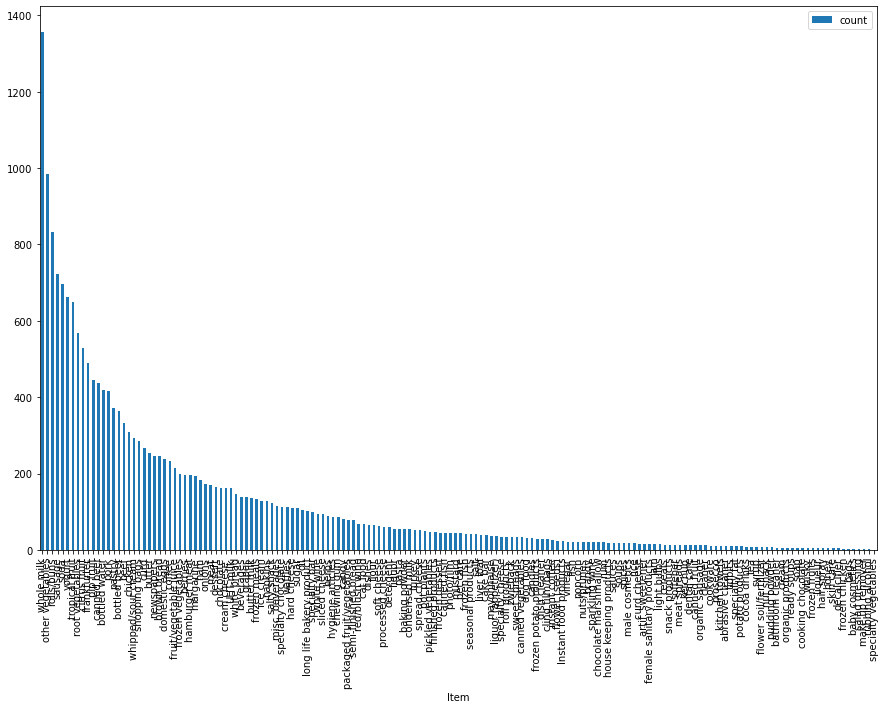

In [7]:

Item_count.plot.bar(x="Item",figsize=(15, 10))

In [51]:
input_item = input("Input value from items: ")

Input value from items: artif. sweetener


In [52]:
Purchase_id_list = Raw_data[Raw_data["Item"]==input_item][["PurchaseID"]]


In [53]:
Select_item_count = Raw_data[Raw_data["PurchaseID"].isin(Purchase_id_list["PurchaseID"])].groupby(by="Item",sort=True)["PurchaseID"].nunique().reset_index(name="count").sort_values(by="count",ascending=False)

Select_item_count["Flag"] = np.where(Select_item_count["Item"]==input_item, 1,0)
Select_item_count

,Item,count,Flag
1,artif. sweetener,16,1
41,whole milk,6,0
35,soda,4,0
33,sausage,3,0
14,domestic eggs,3,0
26,misc. beverages,2,0
19,ham,2,0
6,butter,2,0
29,other vegetables,2,0
15,frankfurter,2,0


<AxesSubplot:xlabel='Item'>

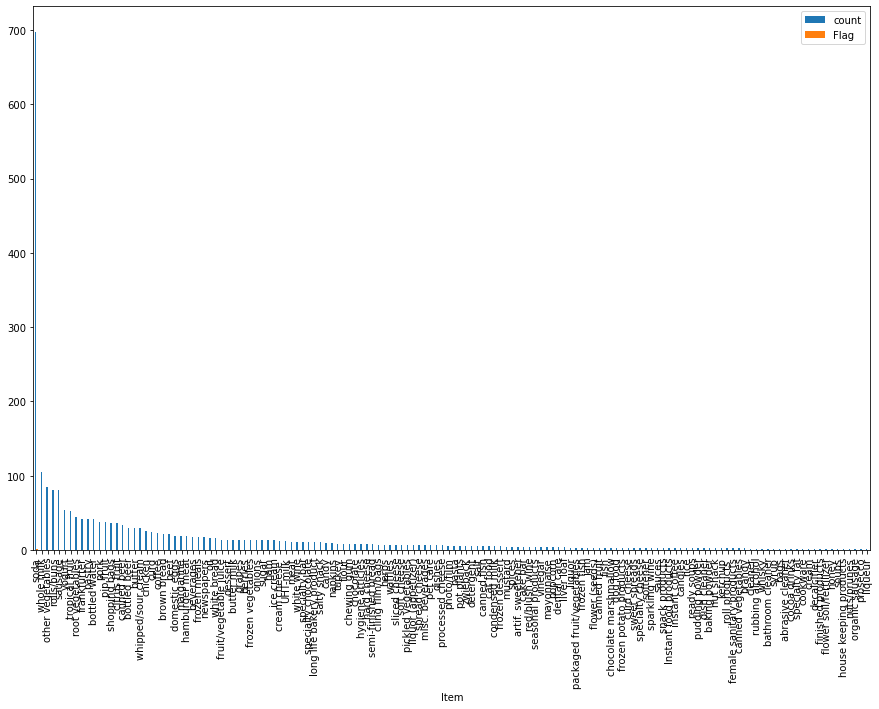

In [11]:

Select_item_count.plot.bar(x="Item" ,figsize=(15, 10))


In [12]:
Raw_data["rank"] = Raw_data.groupby("Item")["PurchaseID"].ngroup()

In [13]:
Raw_data.head(50)

,PurchaseID,Item,Date,rank
0,1,tropical fruit,7/21/15,153
1,1,rolls/buns,7/21/15,120
2,1,candy,7/21/15,19
3,2,whole milk,5/1/15,161
4,2,tropical fruit,5/1/15,153
5,2,chocolate,5/1/15,28
6,3,pip fruit,9/19/15,108
7,3,other vegetables,9/19/15,101
8,3,flour,9/19/15,53
9,4,other vegetables,12/12/15,101


In [33]:
Raw_data_Pivot = Raw_data.pivot(index='PurchaseID', columns='rank', values='Item')
Raw_data_Pivot_NONE = Raw_data_Pivot.fillna('NONE')
Raw_data_Pivot_NONE.shape

(6965, 164)

In [37]:
Raw_data_Pivot_NONE.columns[len(Raw_data_Pivot_NONE.columns)-1]
Raw_data_Pivot_NONE['New_column'] =''
for i in Raw_data_Pivot_NONE.columns:
    if i == Raw_data_Pivot_NONE.columns[-1]:
        Raw_data_Pivot_NONE['New_column'] = Raw_data_Pivot_NONE['New_column'] + Raw_data_Pivot_NONE[i]
    elif i==Raw_data_Pivot_NONE.columns[0] :
        Raw_data_Pivot_NONE['New_column'] = Raw_data_Pivot_NONE[i] +","
    else:
        Raw_data_Pivot_NONE['New_column'] = Raw_data_Pivot_NONE['New_column'] + Raw_data_Pivot_NONE[i] +","
Raw_data_Pivot_NONE

rank,0,1,2,3,4,5,6,7,8,9,...,155,156,157,158,159,160,161,162,163,New_column
PurchaseID,,,,,,,,,,,,,,,,,,,,,
1,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,...,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,"NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,N..."
2,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,...,NONE,NONE,NONE,NONE,NONE,NONE,whole milk,NONE,NONE,"NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,N..."
3,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,...,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,"NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,N..."
4,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,...,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,"NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,N..."
5,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,...,NONE,NONE,NONE,NONE,white bread,NONE,whole milk,NONE,NONE,"NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,N..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6961,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,beef,NONE,...,NONE,NONE,NONE,NONE,NONE,white wine,NONE,NONE,NONE,"NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,beef,N..."
6962,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,...,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,"NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,N..."
6963,NONE,UHT-milk,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,...,NONE,NONE,NONE,NONE,NONE,NONE,whole milk,NONE,NONE,"NONE,UHT-milk,NONE,NONE,NONE,NONE,NONE,NONE,NO..."


In [34]:
Raw_data_Pivot_NONE.columns[-1]

163

In [16]:
#Raw_data_Pivot_NONE['New_column'] = Raw_data_Pivot_NONE[0] +","+Raw_data_Pivot_NONE[1] + ","+Raw_data_Pivot_NONE[2]+","+Raw_data_Pivot_NONE[3]+ ","+Raw_data_Pivot_NONE[4]+ ","+Raw_data_Pivot_NONE[5]+ ","+Raw_data_Pivot_NONE[6]+ ","+Raw_data_Pivot_NONE[7]+ ","+Raw_data_Pivot_NONE[8]+ ","+Raw_data_Pivot_NONE[9]+ ","+Raw_data_Pivot_NONE[10]+ ","+Raw_data_Pivot_NONE[11]+ ","+Raw_data_Pivot_NONE[12]+ ","+Raw_data_Pivot_NONE[13]+ ","+Raw_data_Pivot_NONE[14]+ ","+Raw_data_Pivot_NONE[15]+ ","+Raw_data_Pivot_NONE[16]+ ","+Raw_data_Pivot_NONE[17]+ ","+Raw_data_Pivot_NONE[18]+ ","+Raw_data_Pivot_NONE[19]+ ","+Raw_data_Pivot_NONE[20]+ ","+Raw_data_Pivot_NONE[21]+ ","+Raw_data_Pivot_NONE[22]+ ","+Raw_data_Pivot_NONE[23]+ ","+Raw_data_Pivot_NONE[23]+ ","+Raw_data_Pivot_NONE[24]+ ","+Raw_data_Pivot_NONE[25]+ ","+Raw_data_Pivot_NONE[26]+ ","+Raw_data_Pivot_NONE[27]+ ","+Raw_data_Pivot_NONE[28]+ ","+Raw_data_Pivot_NONE[29]+ ","+Raw_data_Pivot_NONE[30]+ ","+Raw_data_Pivot_NONE[31]+ ","+Raw_data_Pivot_NONE[32]+ ","+Raw_data_Pivot_NONE[33]+ ","+Raw_data_Pivot_NONE[34]+ ","+Raw_data_Pivot_NONE[35]+ ","+Raw_data_Pivot_NONE[36]+ ","+Raw_data_Pivot_NONE[37]

In [38]:
Raw_data_Pivot_NONE['New_column_NONE']=Raw_data_Pivot_NONE['New_column'].replace(",NONE","",regex=True)
Raw_data_Pivot_NONE['New_column_NONE']=Raw_data_Pivot_NONE['New_column_NONE'].replace("NONE,","",regex=True)
Raw_data_Pivot_NONE['New_column_NONE']


PurchaseID
1       candy,rolls/buns,tropical fruit,candy,rolls/bu...
2       chocolate,tropical fruit,whole milk,chocolate,...
3       flour,other vegetables,pip fruit,flour,other v...
4       onions,other vegetables,shopping bags,onions,o...
5       other vegetables,white bread,whole milk,other ...
                              ...                        
6961                     beef,white wine,beef,white wine,
6962                         cake bar,meat,cake bar,meat,
6963             UHT-milk,whole milk,UHT-milk,whole milk,
6964         frankfurter,pip fruit,frankfurter,pip fruit,
6965                         pasta,sausage,pasta,sausage,
Name: New_column_NONE, Length: 6965, dtype: object

In [41]:
Final_dataset = Raw_data_Pivot_NONE['New_column_NONE'].values.tolist()
Final_dataset[0:5]
final_list =[]
for i in Raw_data_Pivot_NONE['New_column_NONE'].values:
       
    a  = i.split(",")
    without_empty_strings = []
    for string in a:
        if (string != ""):
            without_empty_strings.append(string)
    final_list.append(without_empty_strings)
    
    
final_list    

[['candy',
  'rolls/buns',
  'tropical fruit',
  'candy',
  'rolls/buns',
  'tropical fruit'],
 ['chocolate',
  'tropical fruit',
  'whole milk',
  'chocolate',
  'tropical fruit',
  'whole milk'],
 ['flour',
  'other vegetables',
  'pip fruit',
  'flour',
  'other vegetables',
  'pip fruit'],
 ['onions',
  'other vegetables',
  'shopping bags',
  'onions',
  'other vegetables',
  'shopping bags'],
 ['other vegetables',
  'white bread',
  'whole milk',
  'other vegetables',
  'white bread',
  'whole milk'],
 ['citrus fruit',
  'fruit/vegetable juice',
  'rolls/buns',
  'citrus fruit',
  'fruit/vegetable juice',
  'rolls/buns'],
 ['bottled water',
  'other vegetables',
  'shopping bags',
  'bottled water',
  'other vegetables',
  'shopping bags'],
 ['citrus fruit',
  'pot plants',
  'whipped/sour cream',
  'citrus fruit',
  'pot plants',
  'whipped/sour cream'],
 ['newspapers',
  'specialty bar',
  'whole milk',
  'newspapers',
  'specialty bar',
  'whole milk'],
 ['citrus fruit',
  'so

In [49]:
rules = apriori(final_list, min_support = 0.00030, min_confidence = 0.05, min_lift = 3, max_length = 5, target = "rules")
association_results = list(rules)
print(association_results[0])

RelationRecord(items=frozenset({'artif. sweetener', 'domestic eggs'}), support=0.00043072505384063173, ordered_statistics=[OrderedStatistic(items_base=frozenset({'artif. sweetener'}), items_add=frozenset({'domestic eggs'}), confidence=0.1875, lift=5.510284810126582)])


In [50]:
for item in association_results:
    print(item[0])

frozenset({'artif. sweetener', 'domestic eggs'})
frozenset({'sweet spreads', 'berries'})
frozenset({'canned fish', 'beverages'})
frozenset({'frozen dessert', 'beverages'})
frozenset({'bottled beer', 'soups'})
frozenset({'bottled water', 'ketchup'})
frozenset({'roll products ', 'brown bread'})
frozenset({'butter', 'dental care'})
frozenset({'butter', 'nuts/prunes'})
frozenset({'butter', 'popcorn'})
frozenset({'butter', 'sweet spreads'})
frozenset({'long life bakery product', 'butter milk'})
frozenset({'pot plants', 'butter milk'})
frozenset({'zwieback', 'butter milk'})
frozenset({'curd', 'cake bar'})
frozenset({'canned beer', 'cookware'})
frozenset({'canned beer', 'light bulbs'})
frozenset({'pip fruit', 'canned fruit'})
frozenset({'canned vegetables', 'margarine'})
frozenset({'chewing gum', 'photo/film'})
frozenset({'vinegar', 'chicken'})
frozenset({'chocolate', 'sweet spreads'})
frozenset({'cling film/bags', 'frozen vegetables'})
frozenset({'cocoa drinks', 'sausage'})
frozenset({'conde

In [48]:
for item in association_results:
    
    pair = item[0]
    
    items = [x for x in pair]
    if len(pair)>1:
        

        print("Rule : ", items[0], " -> " + items[1] )
        print("Support : ", str(item[1]))
        print("Confidence : ",str(item[2][0][2]))
        print("Lift : ", str(item[2][0][3]))

        print("=============================") 

Rule :  artif. sweetener  -> domestic eggs
Support :  0.00043072505384063173
Confidence :  0.1875
Lift :  5.510284810126582
Rule :  sweet spreads  -> berries
Support :  0.000574300071787509
Confidence :  0.11764705882352942
Lift :  4.1594505822633625
Rule :  canned fish  -> beverages
Support :  0.00043072505384063173
Confidence :  0.06666666666666667
Lift :  3.3405275779376495
Rule :  frozen dessert  -> beverages
Support :  0.00043072505384063173
Confidence :  0.06666666666666667
Lift :  3.3405275779376495
Rule :  bottled beer  -> soups
Support :  0.000574300071787509
Confidence :  0.2105263157894737
Lift :  4.039437436566624
Rule :  bottled water  -> ketchup
Support :  0.00043072505384063173
Confidence :  0.21428571428571427
Lift :  3.5535714285714284
Rule :  roll products   -> brown bread
Support :  0.000574300071787509
Confidence :  0.1142857142857143
Lift :  3.248979591836735
Rule :  butter  -> dental care
Support :  0.00043072505384063173
Confidence :  0.23076923076923078
Lift :  